<a href="https://colab.research.google.com/github/seolibek/Tufts2024/blob/main/tSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from umap_script import loadHSI, show_clusterable_embedding, visualize_tsne, compare_umap, k_means_with_tsne
from sklearn.manifold import TSNE

import numpy as np
import random
import matplotlib.pyplot as plt
import umap

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd drive

/content/drive


In [5]:
cd MyDrive

/content/drive/MyDrive


In [6]:
ls

'Aryaman-draft- Casey Petersen.docx'
 Aryaman-Kaden-PeerReview.docx
"Aryaman's Peer Review of Yahya.gdoc"
'Aryaman Tepal - Beginning of Semester survey spring 2023.gdoc'
'Aryaman Tepal - Notes on your piece of media and research question (1).gdoc'
'Aryaman Tepal - Notes on your piece of media and research question (2).gdoc'
'Aryaman Tepal - Notes on your piece of media and research question.gdoc'
'AryamanTepal_resume (1).pdf'
'AryamanTepal_resume2 (1).pdf'
 AryamanTepal_resume2.pdf
'AryamanTepal_resume (2).pdf'
'AryamanTepal_resume (3).pdf'
'AryamanTepal_resume (4).pdf'
 AryamanTepal_resume.pdf
'Aryaman Tepal Resume.pdf'
'Aryaman_Tepal Resume.pdf'
'Aryaman Tepal Schedule.png'
'Aryaman Tepal Transcript.pdf'
'Aryaman_Tepal Transcript.pdf'
'Blade Runner 2049 - A Human Touch.docx'
'Chem - Poster Content.gdoc'
 Classroom/
'Colab Notebooks'/
'Copy of Ace the Coding Interview ATCI Guide.gdoc'
'Copy of Lab03: Lists (Questionnaire).gdoc'
'Copy of Lab04: Branching (Questionnaire).gdoc'
'Copy of 

Loading in the HSI Data

In [2]:
salinasA_path = 'data/SalinasA_corrected.mat'
salinasA_gt_path = 'data/SalinasA_gt.mat'

X, M, N, D, HSI, GT, Y, n, K = loadHSI(salinasA_path, salinasA_gt_path, 'salinasA_corrected', 'salinasA_gt')

In [5]:
print(HSI.shape)
print(GT.shape)

(7138, 204)
(83, 86)


In [6]:

def tsne_projection_2d(hsi_data, ground_truth, perplexity=30, random_state=42):
  # Reshape the data to (n_samples, n_features)

  # Initialize and fit t-SNE
  tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate='auto', init='random', random_state=random_state)
  embedding = tsne.fit_transform(hsi_data)

  # Visualization
  plt.figure(figsize=(10, 8))
  scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=ground_truth.ravel(), s=0.1, cmap='Spectral')
  plt.title('2D t-SNE Projection of the Dataset')
  plt.colorbar(scatter, label='Spectral classes')
  plt.xlabel('t-SNE 1')
  plt.ylabel('t-SNE 2')
  plt.show()

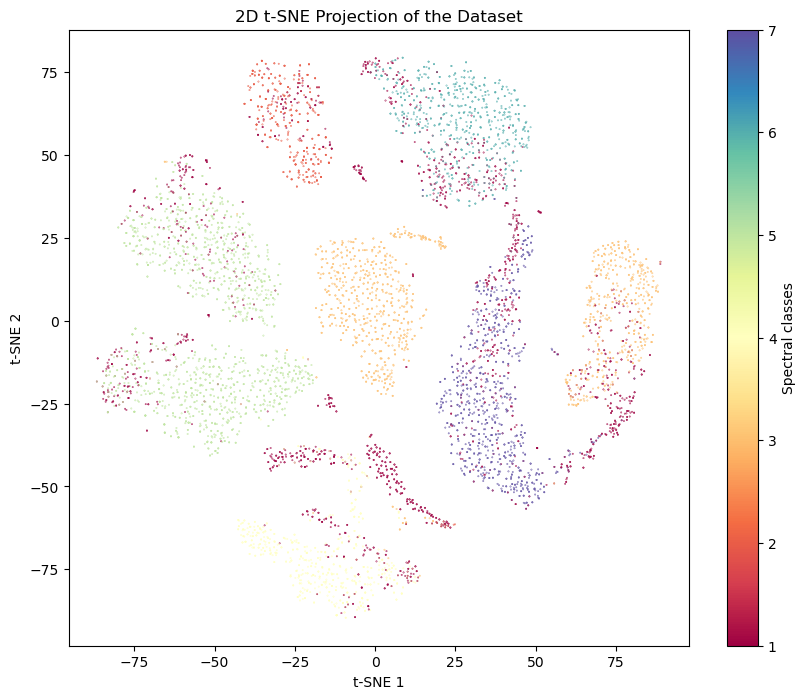

In [7]:
tsne = tsne_projection_2d(HSI, GT)

/opt/anaconda3/envs/csci1470/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


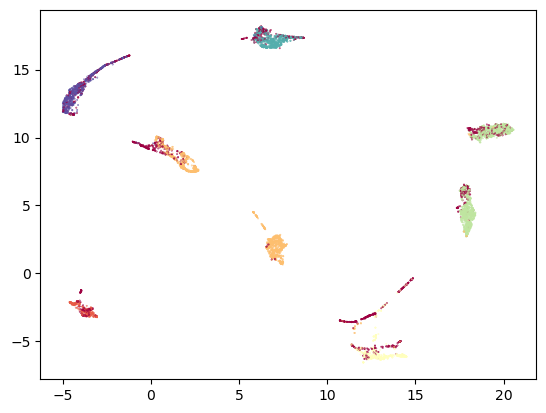

In [8]:
clust_emb = show_clusterable_embedding(HSI, GT)

In [21]:
!pip install ffmpeg

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=c6e87b8d2c82fcb7f43855652747d0f4be7c6667d2f9fad8197b7881e33a56a4
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


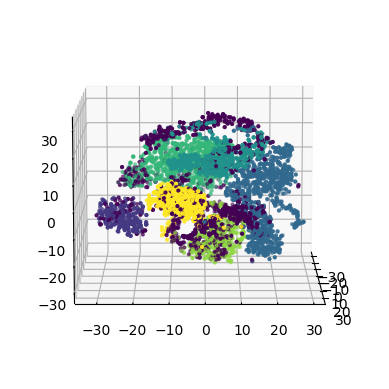

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

In [9]:
from matplotlib.animation import FuncAnimation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
tsne = TSNE(n_components=3, perplexity=30, learning_rate='auto', init='random', random_state=42)
u = tsne.fit_transform(HSI)
ax.scatter(u[:,0], u[:,1], u[:,2], c=GT, s=4)
title = ''
plt.title(title, fontsize=18)
def update(frame):
    ax.view_init(elev=10, azim=frame)
    return fig,
ani = FuncAnimation(fig, update, frames=range(0, 360, 2), blit=True)

plt.show()
ani.save(f'tsne_rotation_SalinasA.mp4', writer='ffmpeg', fps=30)

In [3]:
compare_umap(HSI, GT, 'Salinas A', compare_dim=False, compare_neighbors=True, tSNE=True)



t-SNE Adjusted Rand Index (ARI): 0.18056626572854367
PCA Adjusted Rand Index (ARI): 0.38001187363029676


UMAP Adjusted Rand Index (ARI): 0.3473541570585115


t-SNE Adjusted Rand Index (ARI): 0.3822046716940314


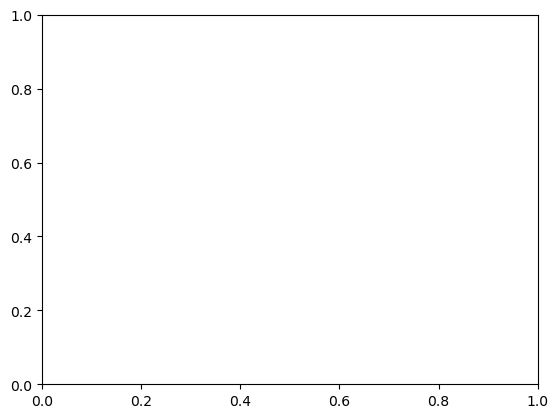

In [54]:
from sklearn.decomposition import PCA

def kmeans_with_pca(data,n_components, ground_truth):
  GT_flat_PCA = ground_truth.flatten()

  pca = PCA(n_components)
  data_reduced = pca.fit_transform(data)

  num_clusters = len(np.unique(GT_flat_PCA))
  # - (1 if 0 in GT_flat_PCA else 0)
  kmeans = KMeans(n_clusters=num_clusters, random_state=42)
  labels = kmeans.fit_predict(data_reduced)

  # Calculate Adjusted Rand Index (ARI)
  ari = adjusted_rand_score(GT_flat_PCA, labels)
  print("PCA Adjusted Rand Index (ARI):", ari)
  return GT_flat_PCA, labels

In [55]:
gt_flat_pca_3, labels_pca_3 = kmeans_with_pca(reshaped_hsi,3, GT)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


PCA Adjusted Rand Index (ARI): 0.3791122936600893


In [56]:
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

def calculate_aligned_accuracy(true_labels, cluster_labels):
    cm = confusion_matrix(true_labels, cluster_labels)

    row_ind, col_ind = linear_sum_assignment(-cm)
    label_mapping = {cluster_label: true_label for cluster_label, true_label in zip(col_ind, row_ind)}
    aligned_labels = [label_mapping[label] for label in cluster_labels]

    accuracy = np.mean(np.array(aligned_labels) == np.array(true_labels))

    return accuracy

In [58]:
print("TSNE:", calculate_aligned_accuracy(gt_tsne_3, labels_tsne_3))
print("PCA:", calculate_aligned_accuracy(gt_flat_pca_3, labels_pca_3))

TSNE: 0.5612216307088821
PCA: 0.5623423928271224
